## Telecom churn Case Study

## Problem Statement

#### 
In the telecommunications sector, customers have the option to select from various service providers and frequently switch between operators. Within this fiercely competitive market, the telecom industry witnesses an annual churn rate averaging between 15-25%. Recognizing that acquiring a new customer entails a cost 5-10 times higher than retaining an existing one, the emphasis has shifted towards prioritizing customer retention over customer acquisition.
Within this project, our focus will be on scrutinizing customer-level data from a prominent telecommunications company. Our objective is to construct predictive models that can effectively pinpoint customers with a heightened risk of churn. Additionally, we aim to discern the primary indicators or factors contributing to customer churn through our analysis.


## Objective

#### 
The primary business objective is to predict potential churn among high-value customers within a telecom operator. To achieve this goal, we will focus on predicting churn based on the action period, with the understanding that the churn period data should be removed after labeling. Churn prediction will be primarily informed by customer usage patterns. The emphasis is on identifying and forecasting the likelihood of churn specifically among high-value customers.

In [2]:
## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
churn_pred = pd.read_csv("train.csv")

In [4]:
churn_pred.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [6]:
churn_pred.shape

(69999, 172)

#### There are 172 columns and 69999 rows

In [7]:
churn_pred.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [8]:
churn_pred.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [9]:
churn_pred.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [10]:
churn_pred.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [11]:
churn_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [12]:
# checking for null values
misssingvalues=churn_pred.isnull().sum()
print(misssingvalues)

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64


In [13]:
# Checking null value percentage
churn_pred.isna().sum()/churn_pred.isna().count()*100

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

In [14]:
pd.options.display.max_rows = 999

In [15]:
# checking for duplicates
churn_pred.drop_duplicates(subset=None, inplace=True)
churn_pred.shape

(69999, 172)

In [16]:
churn_pred.axes

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             69989, 69990, 69991, 69992, 69993, 69994, 69995, 69996, 69997,
             69998],
            dtype='int64', length=69999),
 Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
        'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'arpu_6', 'arpu_7',
        ...
        'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
        'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
       dtype='object', length=172)]

In [17]:
# checking the missing value ratio in each column
churn_pred.isnull().sum()*100/churn_pred.shape[0]

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [18]:
# some columns do not have minimum value 1
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
                 ]

churn_pred[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


####
We have the option to generate a novel feature named "total_rech_amt_data" by combining "total_rech_data" and "av_rech_amt_data" to represent the amount spent by customers on data usage.

Additionally, since the minimum value is 1, we can fill the missing values with 0, assuming that no recharges were carried out by the customer during that period.

The absence of both recharge date and recharge value simultaneously indicates that the customer did not perform a recharge during that specific period.

In [19]:
churn_pred.loc[churn_pred.total_rech_data_6.isnull() & churn_pred.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


####
In the recharge month variable where min value is 1, we can impute the missing values with zeroes since it means customer didn't recharge that month

In [20]:
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [21]:
# impute missing values with 0
churn_pred[zero_impute] = churn_pred[zero_impute].apply(lambda x: x.fillna(0))

In [22]:
# Now, it is essential to ensure that the values are correctly filled, and we can verify this by examining the "Missing Value Ratio."
churn_pred[zero_impute].isnull().sum()*100/churn_pred.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [23]:
churn_pred[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.619309,0.683981,0.697867,48.395787,51.415168,51.782975,31.748339,32.260075,32.986614
std,1.762010,1.943193,1.973434,126.923180,133.246541,131.291162,77.519536,78.069163,78.808337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,8.000000,17.000000,23.000000,8.000000,14.000000,17.000000
max,61.000000,54.000000,60.000000,5920.000000,4365.000000,4076.000000,1555.000000,1555.000000,1555.000000


In [24]:
# creating column types by there types
id_col = ['id', 'circle_id']

date_col = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'             
            ]

cat_col =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]

num_col = [column for column in churn_pred.columns if column not in id_col + date_col + cat_col]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_col), len(date_col), len(num_col), len(cat_col)))

# check if we have missed any column or not
print(len(id_col) + len(date_col) + len(num_col) + len(cat_col) == churn_pred.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6
True


In [25]:
# drop id and date columns
churn_pred = churn_pred.drop(id_col + date_col, axis=1)
#check the shape again
churn_pred.shape

(69999, 161)

In [26]:
# replacing missing values with '-1' in categorical columns
churn_pred[cat_col] = churn_pred[cat_col].apply(lambda x: x.fillna(-1))

In [27]:
# missing value ratio
churn_pred[cat_col].isnull().sum()*100/churn_pred.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

### Dropping variables where threshold is greater than 70 percent

In [28]:
initial_cols = churn_pred.shape[1]

missing_threshold = 0.7

include_cols = list(churn_pred.apply(lambda column: True if column.isnull().sum()/churn_pred.shape[0] < missing_threshold else False))

drop_missing = pd.DataFrame({'features':churn_pred.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


In [29]:
#checking the shape of a dataframe
churn_pred.shape

(69999, 161)

In [30]:
churn_pred.isnull().sum()*100/churn_pred.shape[0]

loc_og_t2o_mou         1.002871
std_og_t2o_mou         1.002871
loc_ic_t2o_mou         1.002871
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            3.954342
onnet_mou_7            3.838626
onnet_mou_8            5.290076
offnet_mou_6           3.954342
offnet_mou_7           3.838626
offnet_mou_8           5.290076
roam_ic_mou_6          3.954342
roam_ic_mou_7          3.838626
roam_ic_mou_8          5.290076
roam_og_mou_6          3.954342
roam_og_mou_7          3.838626
roam_og_mou_8          5.290076
loc_og_t2t_mou_6       3.954342
loc_og_t2t_mou_7       3.838626
loc_og_t2t_mou_8       5.290076
loc_og_t2m_mou_6       3.954342
loc_og_t2m_mou_7       3.838626
loc_og_t2m_mou_8       5.290076
loc_og_t2f_mou_6       3.954342
loc_og_t2f_mou_7       3.838626
loc_og_t2f_mou_8       5.290076
loc_og_t2c_mou_6       3.954342
loc_og_t2c_mou_7       3.838626
loc_og_t2c_mou_8       5.290076
loc_og_mou_6           3.954342
loc_og_m

In [34]:
num_col = [column for column in churn_pred.columns if column not in id_col + date_col + cat_col]
num_col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [35]:
#imputing with meadian for num_cols
churn_pred[num_col] = churn_pred[num_col].apply(lambda x: x.fillna(x.median()))

In [36]:
churn_pred.isnull().sum()*100/churn_pred.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

### 

In the context of churn prediction, we consider three distinct phases in the customer lifecycle:

The 'good & action' phase, which encompasses Month 6 and Month 7.
The 'churn' phase, which corresponds to Month 8.
Given the three-month window for analysis, the initial two months constitute the 'good & action' phase, while the third month represents the 'churn' phase


## Filtering high-value customers

In [37]:
# calculate the total data recharge amount for June and July: number of recharges * average recharge amount
churn_pred['total_data_rech_6'] = churn_pred.total_rech_data_6 * churn_pred.av_rech_amt_data_6
churn_pred['total_data_rech_7'] = churn_pred.total_rech_data_7 * churn_pred.av_rech_amt_data_7

In [38]:
# calculate total recharge amount for June and July: call recharge amount + data recharge amount
churn_pred['amt_data_6'] = churn_pred.total_rech_amt_6 + churn_pred.total_data_rech_6
churn_pred['amt_data_7'] = churn_pred.total_rech_amt_7 + churn_pred.total_data_rech_7

In [39]:
# calculate average recharge done by customer in June and July
churn_pred['av_amt_data_6_7'] = (churn_pred.amt_data_6 + churn_pred.amt_data_7)/2

In [40]:
# look at the 70th percentile recharge amount
print("Recharge amount 70th percentile: {0}".format(churn_pred.av_amt_data_6_7.quantile(0.7)))

Recharge amount 70th percentile: 477.5


In [41]:
churn_pred.head()
churn_pred.shape

(69999, 166)

### Keep only those customers who have recharged their mobiles with an amount greater than or equal to the 70th percentile.

In [42]:
churn_pred_filtered = churn_pred.loc[churn_pred.av_amt_data_6_7 >= churn_pred.av_amt_data_6_7.quantile(0.7), :]
churn_pred_filtered = churn_pred_filtered.reset_index(drop=True)

In [43]:
churn_pred_filtered.shape

(21013, 166)

In [44]:
# deleting variables created to filter high-value customers
churn_pred_filtered = churn_pred_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)

In [45]:
churn_pred_filtered.shape

(21013, 161)

### Deriving churn

### 
To determine churn, we utilize data from the eighth month (referred to as the 'churn' phase). To create the target variable (which is not provided in this study and needs to be derived from the churn phase data), we must calculate the churn variable using the attributes total_ic_mou_8, total_og_mou_8, vol_2g_mb_8, and vol_3g_mb_8.

In [46]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
churn_pred_filtered[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_8  21013 non-null  float64
 1   total_og_mou_8  21013 non-null  float64
 2   vol_2g_mb_8     21013 non-null  float64
 3   vol_3g_mb_8     21013 non-null  float64
dtypes: float64(4)
memory usage: 656.8 KB


0    27.534679
1     2.484321
Name: churn_probability, dtype: float64


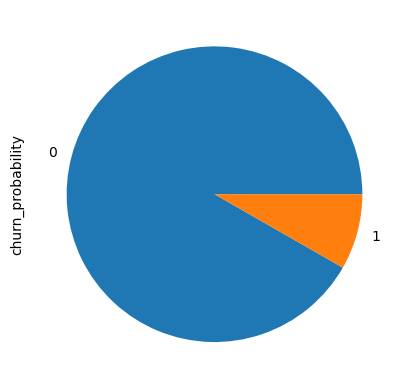

In [47]:
# lets find out churn/non churn percentage
print((churn_pred_filtered['churn_probability'].value_counts()/len(churn_pred))*100)
((churn_pred_filtered['churn_probability'].value_counts()/len(churn_pred))*100).plot(kind="pie")
plt.show()

## Equivalent to 90 % of customers are not churning. There is a possibility of class imbalance

####
As the variable "churn" serves as the target variable, all columns associated with this variable (i.e., those with the suffix _8) can be removed from the dataset. Cleaning the data further involves considering a few columns related to the 'good' phase.

Columns derived during the earlier 'good' phase can be excluded during their creation for a more refined dataset.

In [48]:
churn_pred_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

###
New columns can be generated to define the variables during the 'good' phase, and subsequently, the individual 6th and 7th-month variables can be discarded. Before proceeding with the handling of remaining missing values, it is advisable to examine the collinearity among the independent variables and comprehend their interdependencies.

In [49]:
# creating a list of column names for each month
mon_6_cols = [col for col in churn_pred_filtered.columns if '_6' in col]
mon_7_cols = [col for col in churn_pred_filtered.columns if '_7' in col]
mon_8_cols = [col for col in churn_pred_filtered.columns if '_8' in col]

In [50]:
mon_7_cols

['arpu_7',
 'onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'total_og_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7',
 'total_rech_num_7',
 'max_rech_amt_7',
 'last_day_rch_amt_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'vol_2g_mb_7',
 'vol_3g_mb_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'monthly_2g_7',
 'sachet_2g_7',
 'monthly_3g_7',
 'sachet_3g_7',
 'fb_user_7']

In [51]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
churn_corr = churn_pred_filtered.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)

sachet_2g_7         count_rech_2g_7       0.982175
sachet_2g_8         count_rech_2g_8       0.980162
sachet_2g_6         count_rech_2g_6       0.978498
total_rech_amt_8    arpu_8                0.958953
fb_user_6           night_pck_user_6      0.957744
isd_og_mou_8        isd_og_mou_7          0.956635
fb_user_7           night_pck_user_7      0.955499
fb_user_8           night_pck_user_8      0.954382
arpu_2g_7           arpu_3g_7             0.939613
arpu_2g_6           arpu_3g_6             0.937203
isd_og_mou_7        isd_og_mou_6          0.936012
arpu_2g_8           arpu_3g_8             0.935749
isd_og_mou_8        isd_og_mou_6          0.934200
total_ic_mou_6      loc_ic_mou_6          0.901348
total_ic_mou_8      loc_ic_mou_8          0.898511
sachet_2g_8         total_rech_data_8     0.897476
total_ic_mou_7      loc_ic_mou_7          0.883143
sachet_3g_8         count_rech_3g_8       0.882179
count_rech_2g_8     total_rech_data_8     0.865681
sachet_3g_7         count_rech_

In [52]:
## Dropping columns thatare highly collinear to predictor variables
col_to_drop=['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7',               
               'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7']

In [53]:
churn_pred_filtered.drop(col_to_drop, axis=1, inplace=True)

In [54]:
churn_pred_filtered.shape

(21013, 147)

## Data Preparation and EDA

In [55]:
## Deriving a new variable from a column called 'aon' corresponding to churn
churn_pred_filtered['tenure'] = (churn_pred_filtered['aon']/30).round(0)

In [56]:
churn_pred_filtered.drop('aon',axis=1, inplace=True)

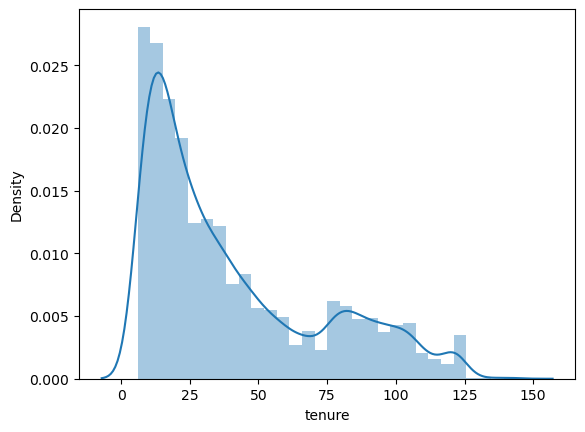

In [57]:
## Distribution of tenure var
sns.distplot(churn_pred_filtered['tenure'],bins=30)
plt.show()

In [58]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_pred_filtered['tenure_range'] = pd.cut(churn_pred_filtered['tenure'], tn_range, labels=tn_label)
churn_pred_filtered['tenure_range'].head()

0    1-2 Yrs
1    1-2 Yrs
2    1-2 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

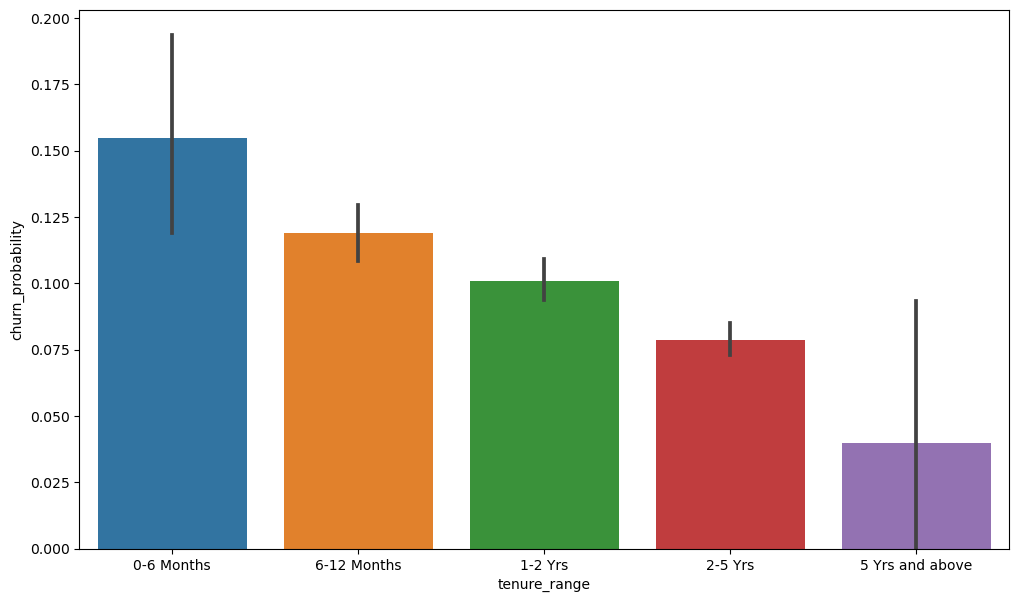

In [59]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=churn_pred_filtered)
plt.show()

###
Observing the data reveals that the highest churn rate occurs within the initial 0-6 months but diminishes gradually as customers remain in the network.

The average revenue per user during the 'good' phase is represented by arpu_6 and arpu_7. Since we have two distinct averages, let's compute an average of these two and eliminate the other columns.

In [60]:
churn_pred_filtered["avg_arpu_6_7"]= (churn_pred_filtered['arpu_6']+churn_pred_filtered['arpu_7'])/2
churn_pred_filtered['avg_arpu_6_7'].head()

0     184.4495
1     478.9215
2    1018.2270
3     362.0215
4     370.7370
Name: avg_arpu_6_7, dtype: float64

In [61]:
## Dropping the original columns as they are derived to a new column for better understanding of the data

churn_pred_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

In [62]:
churn_pred_filtered.shape

(21013, 147)

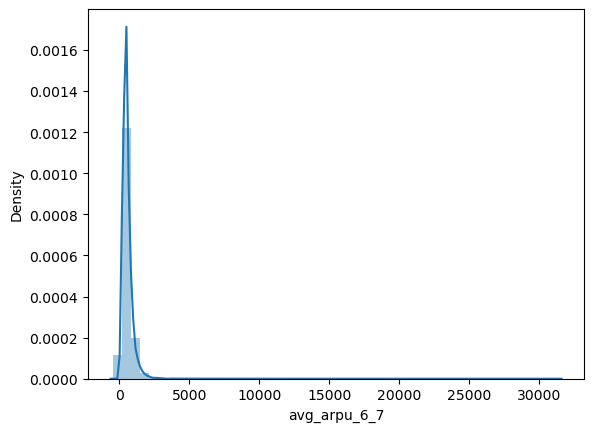

In [63]:
sns.distplot(churn_pred_filtered['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

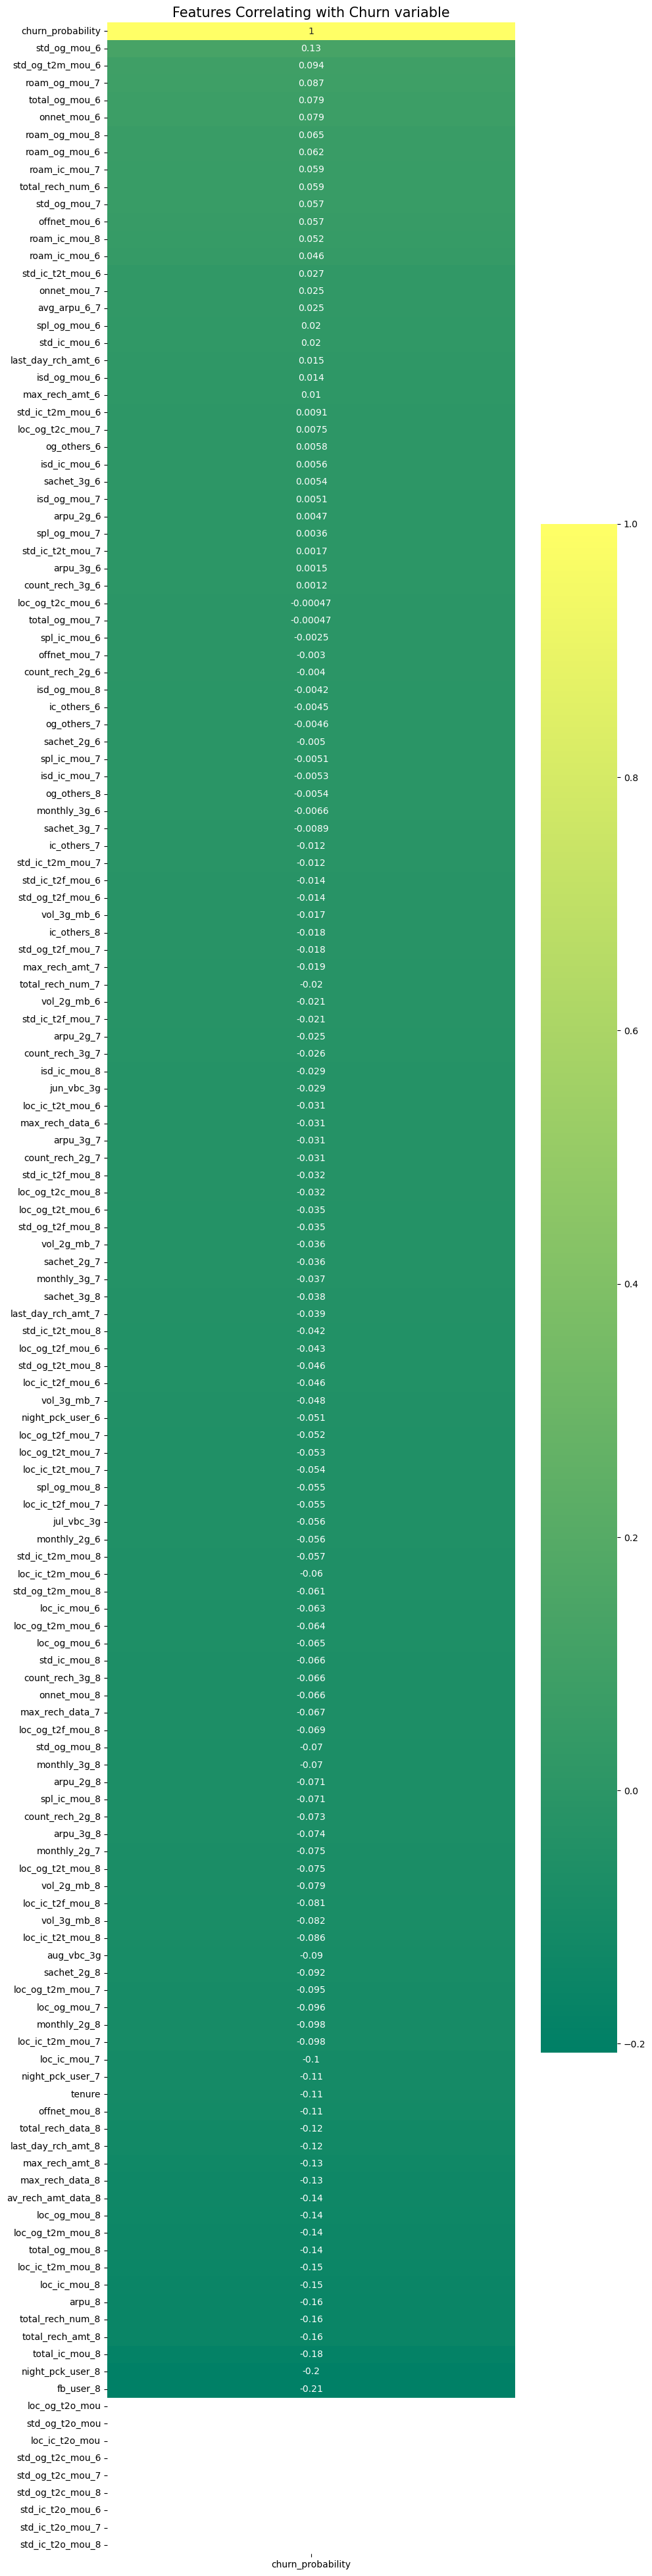

In [64]:
# Ch;:churn_probability with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(churn_pred_filtered.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

In [65]:
churn_pred_filtered.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'tenure', 'tenure_range',
       'avg_arpu_6_7'],
      dtype='object', length=147)

### Inference:

Avg Outgoing Calls & calls on roaming for 6th & 7th months are positively correlated with churn.
Avg Revenue, No. of Recharge for 8th month has negative correlation with churn.

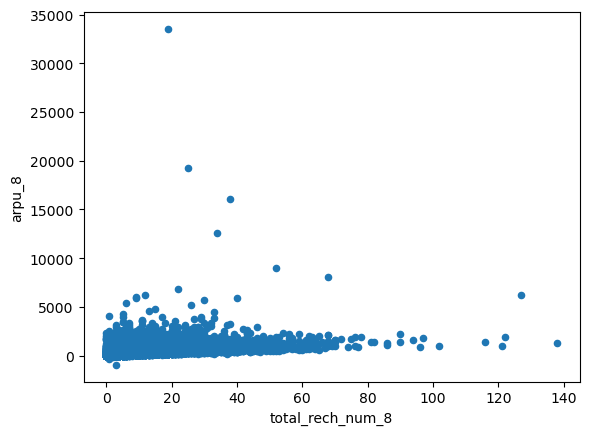

In [66]:
## Scatter plot betwee n total_recharge & avg_revenue for 8th month
churn_pred_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',y='arpu_8')
plt.show()

In [67]:
# Creating categories for month 8 column totalrecharge and their count
churn_pred_filtered['total_rech_data_group_8']=pd.cut(churn_pred_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
churn_pred_filtered['total_rech_num_group_8']=pd.cut(churn_pred_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     10729
No_Recharge         9833
10-25_Recharges      421
>25_Recharges         30
Name: total_rech_data_group_8, dtype: int64


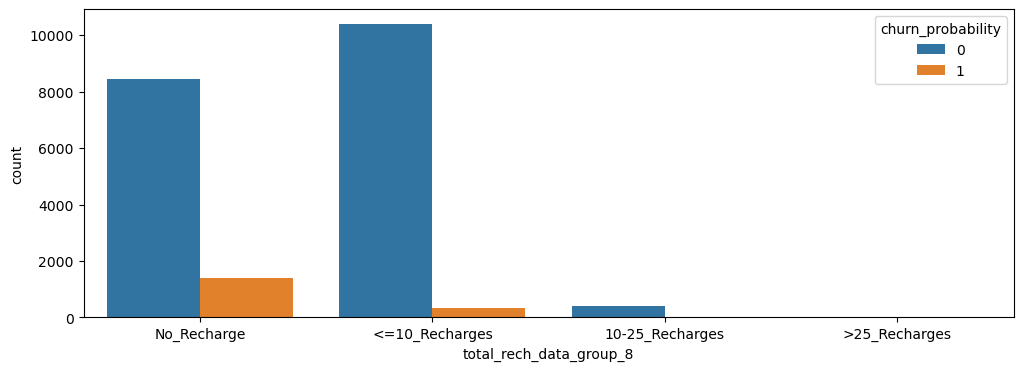

					Distribution of total_rech_num_8 variable
 <=10_Recharges     13533
10-25_Recharges     5829
>25_Recharges       1255
No_Recharge          396
Name: total_rech_num_group_8, dtype: int64


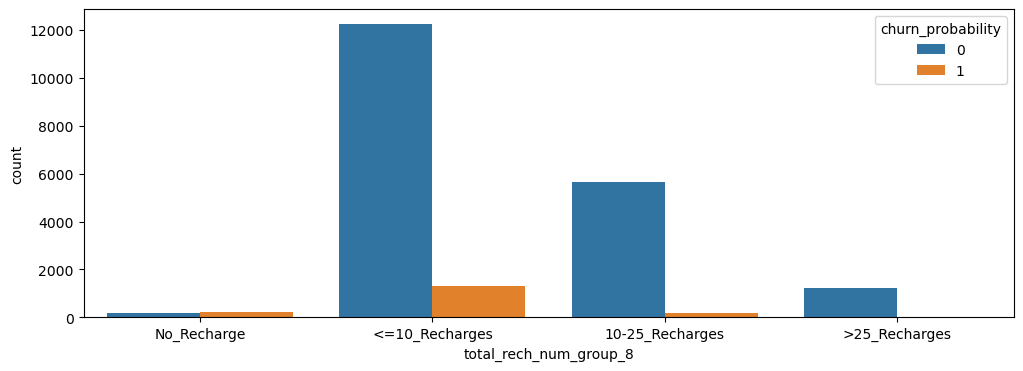

In [68]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=churn_pred_filtered,x="total_rech_data_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",churn_pred_filtered['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=churn_pred_filtered,x="total_rech_num_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",churn_pred_filtered['total_rech_num_group_8'].value_counts())
plt.show()

#### Observation: Churn rate decreases when there are frequent recharges

In [69]:
churn_pred_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6','sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8',], axis=1, inplace=True)

In [70]:
churn_pred_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [71]:
churn_pred_filtered.shape

(21013, 68)

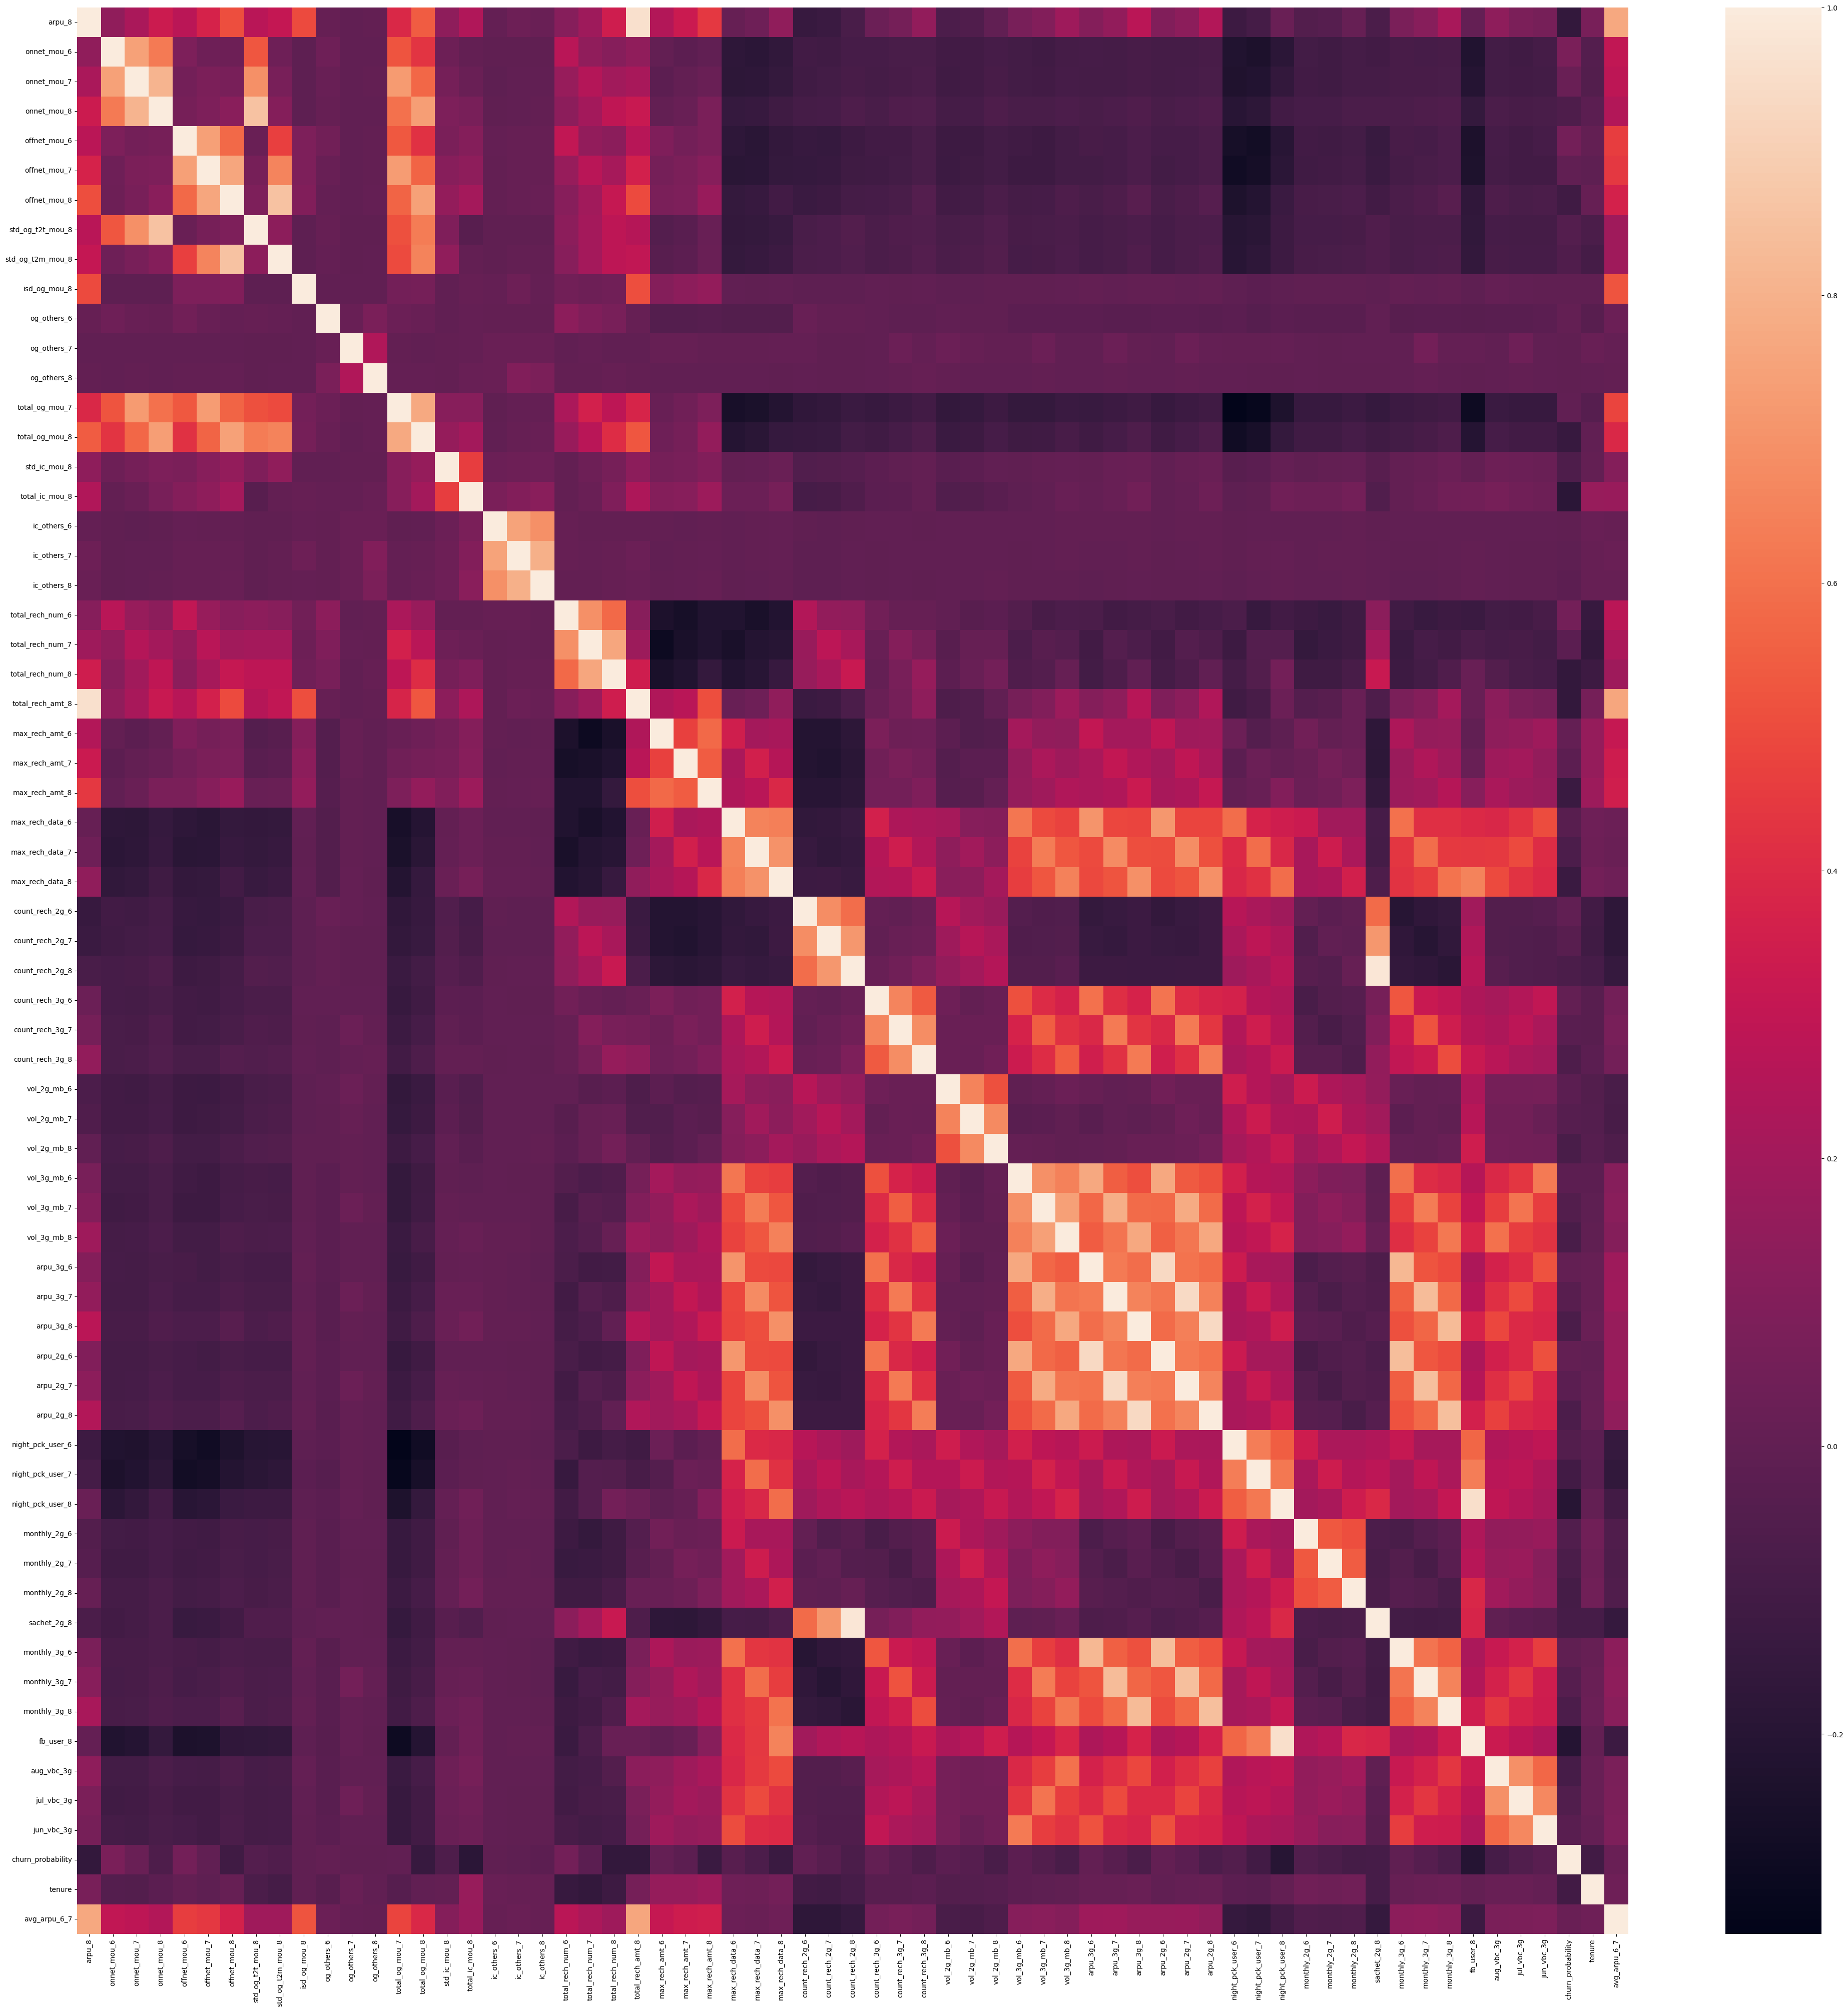

In [72]:
plt.figure(figsize = (50, 50))
sns.heatmap(churn_pred_filtered.corr())
plt.show()

In [73]:
churn_pred_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 68 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   arpu_8                   21013 non-null  float64 
 1   onnet_mou_6              21013 non-null  float64 
 2   onnet_mou_7              21013 non-null  float64 
 3   onnet_mou_8              21013 non-null  float64 
 4   offnet_mou_6             21013 non-null  float64 
 5   offnet_mou_7             21013 non-null  float64 
 6   offnet_mou_8             21013 non-null  float64 
 7   std_og_t2t_mou_8         21013 non-null  float64 
 8   std_og_t2m_mou_8         21013 non-null  float64 
 9   isd_og_mou_8             21013 non-null  float64 
 10  og_others_6              21013 non-null  float64 
 11  og_others_7              21013 non-null  float64 
 12  og_others_8              21013 non-null  float64 
 13  total_og_mou_7           21013 non-null  float64 
 14  total_

In [74]:
churn_pred_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)

In [75]:
churn_pred_filtered.shape

(21013, 66)

In [76]:
churn_pred_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   arpu_8             21013 non-null  float64 
 1   onnet_mou_6        21013 non-null  float64 
 2   onnet_mou_7        21013 non-null  float64 
 3   onnet_mou_8        21013 non-null  float64 
 4   offnet_mou_6       21013 non-null  float64 
 5   offnet_mou_7       21013 non-null  float64 
 6   offnet_mou_8       21013 non-null  float64 
 7   std_og_t2t_mou_8   21013 non-null  float64 
 8   std_og_t2m_mou_8   21013 non-null  float64 
 9   isd_og_mou_8       21013 non-null  float64 
 10  og_others_6        21013 non-null  float64 
 11  og_others_7        21013 non-null  float64 
 12  og_others_8        21013 non-null  float64 
 13  total_og_mou_7     21013 non-null  float64 
 14  total_og_mou_8     21013 non-null  float64 
 15  std_ic_mou_8       21013 non-null  float64 
 16  tota

In [77]:
churn_pred_filtered.drop(['tenure_range'] , axis=1, inplace=True)

In [78]:
churn_pred_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arpu_8             21013 non-null  float64
 1   onnet_mou_6        21013 non-null  float64
 2   onnet_mou_7        21013 non-null  float64
 3   onnet_mou_8        21013 non-null  float64
 4   offnet_mou_6       21013 non-null  float64
 5   offnet_mou_7       21013 non-null  float64
 6   offnet_mou_8       21013 non-null  float64
 7   std_og_t2t_mou_8   21013 non-null  float64
 8   std_og_t2m_mou_8   21013 non-null  float64
 9   isd_og_mou_8       21013 non-null  float64
 10  og_others_6        21013 non-null  float64
 11  og_others_7        21013 non-null  float64
 12  og_others_8        21013 non-null  float64
 13  total_og_mou_7     21013 non-null  float64
 14  total_og_mou_8     21013 non-null  float64
 15  std_ic_mou_8       21013 non-null  float64
 16  total_ic_mou_8     210

In [79]:
churn_rate = (sum(churn_pred_filtered["churn_probability"])/len(churn_pred_filtered["churn_probability"].index))*100
churn_rate

8.275829248560415

## Train-Test split

In [80]:
X = churn_pred_filtered.drop("churn_probability", axis = 1)
y = churn_pred_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4, stratify = y)

In [81]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16810, 64)
(16810,)
(4203, 64)
(4203,)


## Scaling

In [82]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
14734,716.870,64.96,66.91,100.43,327.03,579.19,454.64,0.46,17.61,1.69,...,0,1,1,1,1.0,100.39,110.66,386.73,90.0,659.2450
17095,102.095,3.21,9.84,1.01,25.54,26.23,20.94,0.00,0.00,0.00,...,6,0,0,0,1.0,0.00,0.00,0.00,24.0,216.4250
2602,606.283,14.36,2.89,6.86,356.19,364.28,516.36,0.00,342.28,0.00,...,0,0,0,0,-1.0,0.00,0.00,0.00,81.0,412.9240
7619,170.790,42.88,10.63,16.46,113.84,132.93,107.43,0.00,0.43,0.00,...,0,0,0,0,1.0,4.28,64.47,25.67,49.0,326.7205
19276,773.809,86.54,75.19,57.01,384.64,581.58,704.86,0.38,13.40,0.00,...,0,0,0,0,-1.0,0.00,0.00,0.00,38.0,533.3280


In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16810 entries, 14734 to 20561
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arpu_8            16810 non-null  float64
 1   onnet_mou_6       16810 non-null  float64
 2   onnet_mou_7       16810 non-null  float64
 3   onnet_mou_8       16810 non-null  float64
 4   offnet_mou_6      16810 non-null  float64
 5   offnet_mou_7      16810 non-null  float64
 6   offnet_mou_8      16810 non-null  float64
 7   std_og_t2t_mou_8  16810 non-null  float64
 8   std_og_t2m_mou_8  16810 non-null  float64
 9   isd_og_mou_8      16810 non-null  float64
 10  og_others_6       16810 non-null  float64
 11  og_others_7       16810 non-null  float64
 12  og_others_8       16810 non-null  float64
 13  total_og_mou_7    16810 non-null  float64
 14  total_og_mou_8    16810 non-null  float64
 15  std_ic_mou_8      16810 non-null  float64
 16  total_ic_mou_8    16810 non-null  fl

In [84]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [85]:
from sklearn import preprocessing
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

<Axes: >

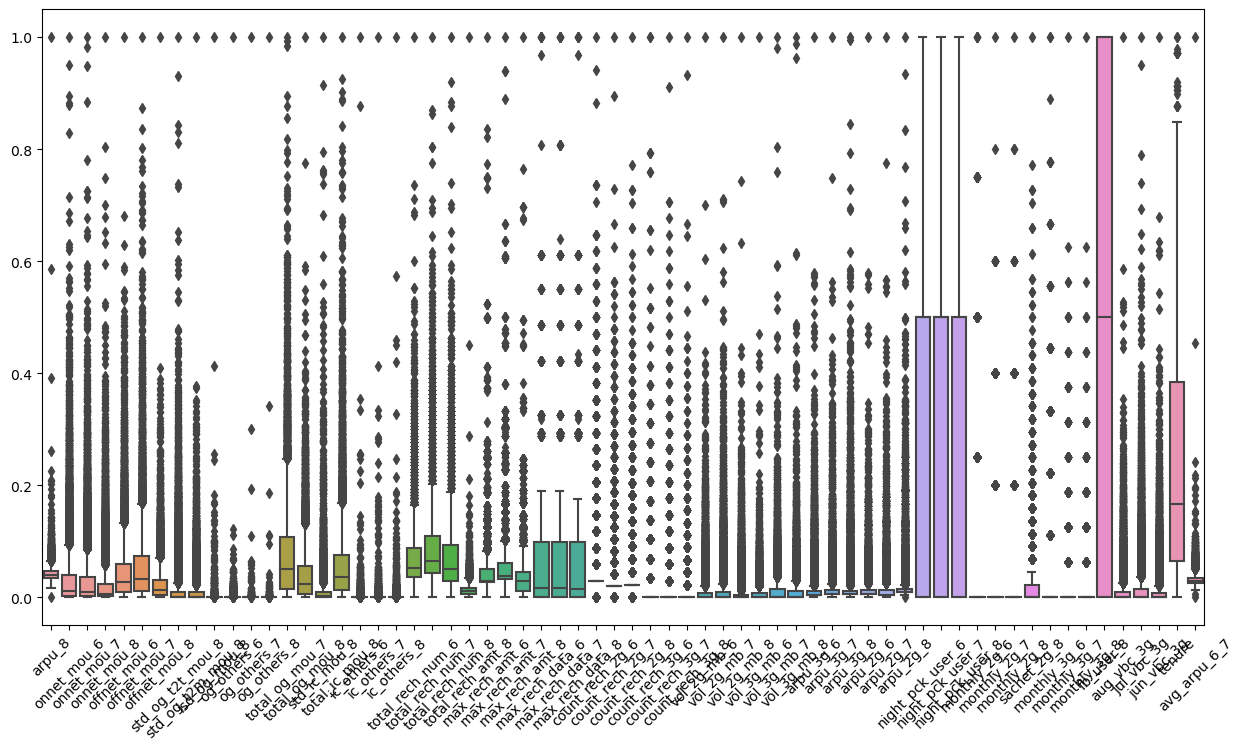

In [86]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train, columns=num_col))

In [87]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
14734,0.048208,0.008806,0.008202,0.010066,0.039107,0.085932,0.032457,0.000057,0.001262,0.000466,...,0.000000,0.111111,0.0625,0.0625,1.0,0.007772,0.012073,0.034634,0.608696,0.034837
17095,0.030383,0.000435,0.001206,0.000101,0.003054,0.003892,0.001495,0.000000,0.000000,0.000000,...,0.136364,0.000000,0.0000,0.0000,1.0,0.000000,0.000000,0.000000,0.130435,0.020951
2602,0.045002,0.001947,0.000354,0.000688,0.042594,0.054047,0.036864,0.000000,0.024536,0.000000,...,0.000000,0.000000,0.0000,0.0000,0.0,0.000000,0.000000,0.000000,0.543478,0.027113
7619,0.032375,0.005813,0.001303,0.001650,0.013613,0.019722,0.007670,0.000000,0.000031,0.000000,...,0.000000,0.000000,0.0000,0.0000,1.0,0.000331,0.007034,0.002299,0.311594,0.024410
19276,0.049859,0.011732,0.009217,0.005714,0.045997,0.086287,0.050321,0.000047,0.000961,0.000000,...,0.000000,0.000000,0.0000,0.0000,0.0,0.000000,0.000000,0.000000,0.231884,0.030889


## Handling data imbalance

####
Data imbalance handling using SMOTE

In [88]:
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [89]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (30838, 64)
Dimension of y_train_sm Shape: (30838,)


## Logistic Regression

In [90]:
# Logistic regression model
log_model1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
log_model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                30838
Model:                            GLM   Df Residuals:                    30773
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 04 Mar 2024   Deviance:                       24339.
Time:                        18:22:42   Pearson chi2:                 1.83e+06
No. Iterations:                    12   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7544      0.327      5.358      0.000       1.113       2.396
arpu_8             -13.7841      6.611     -2.085      0.037     -26.741      -0.828
onnet_mou_6         -0.5220      0.470     -1.111      0.267      -1.443       0.399
onnet_mou_7         -4.6636      2.051     -2.274      0.023      -8.683      -0.644
onnet_mou_8         65.6555      3.425     19.172      0.000      58.943      72.368
offnet_mou_6        -1.2747      0.543     -2.346      0.019      -2.340      -0.210
offnet_mou_7        -3.1456      1.684     -1.868      0.062      -6.446       0.155
offnet_mou_8        83.3853      4.439     18.783      0.000      74.684      92.086
std_og_t2t_mou_8     8.2330      1.536      5.360      0.000       5.222      11.244
std_og_t2m_mou_8    18.3877      2.710      6.786      0.000      13.077      23.698
isd_og_mou_8        30.7009      3.872      7.929      0.000      23.112      38.290
og_others_6        -15.9596      6.211     -2.570      0.010     -28.133      -3.786
og_others_7         -1.7227      9.438     -0.183      0.855     -20.222      16.776
og_others_8      -1130.0623    615.784     -1.835      0.066   -2336.976      76.851
total_og_mou_7       5.4180      1.915      2.830      0.005       1.665       9.171
total_og_mou_8    -105.2024      4.242    -24.801      0.000    -113.516     -96.888
std_ic_mou_8         5.8948      1.446      4.076      0.000       3.060       8.730
total_ic_mou_8     -20.9146      0.910    -22.989      0.000     -22.698     -19.132
ic_others_6        -12.1191      4.984     -2.431      0.015     -21.888      -2.350
ic_others_7          5.0203      4.344      1.156      0.248      -3.493      13.533
ic_others_8          9.4438      4.365      2.163      0.031       0.888      18.000
total_rech_num_6     0.8696      0.589      1.476      0.140      -0.285       2.025
total_rech_num_7     3.6889      0.607      6.073      0.000       2.498       4.880
total_rech_num_8    -9.9323      0.720    -13.789      0.000     -11.344      -8.521
total_rech_amt_8   -77.6875      8.170     -9.509      0.000     -93.700     -61.675
max_rech_amt_6      -2.6822      0.579     -4.632      0.000      -3.817      -1.547
max_rech_amt_7       1.0145      0.465      2.182      0.029       0.103       1.926
max_rech_amt_8       0.4822      0.994      0.485      0.628      -1.467       2.431
max_rech_data_6      2.9335      0.612      4.797      0.000       1.735       4.132
max_rech_data_7      1.4762      0.596      2.478      0.013       0.309       2.644
max_rech_data_8     -3.5450      0.789     -4.492      0.000      -5.092      -1.998
count_rech_2g_6      0.0204      0.409      0.050      0.960      -0.782       0.823
count_rech_2g_7      1.8701      0.609      3.071      0.002       0.677       3.064
count_rech_2g_8    -63.

## LR with RFE

In [91]:
logreg = LogisticRegression()

# RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [92]:
rfe.support_

array([False,  True,  True, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True])

In [93]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("RFE selected columns: \n\n",rfe_columns)

RFE selected columns: 

 Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_7', 'offnet_mou_8',
       'total_og_mou_8', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_8',
       'count_rech_3g_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_7',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_7', 'monthly_3g_8',
       'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [94]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 4),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 38),
 ('offnet_mou_6', False, 3),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('std_og_t2t_mou_8', False, 8),
 ('std_og_t2m_mou_8', False, 33),
 ('isd_og_mou_8', False, 12),
 ('og_others_6', False, 23),
 ('og_others_7', False, 32),
 ('og_others_8', False, 37),
 ('total_og_mou_7', False, 9),
 ('total_og_mou_8', True, 1),
 ('std_ic_mou_8', False, 2),
 ('total_ic_mou_8', True, 1),
 ('ic_others_6', False, 39),
 ('ic_others_7', False, 34),
 ('ic_others_8', False, 45),
 ('total_rech_num_6', True, 1),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 6),
 ('max_rech_amt_6', False, 24),
 ('max_rech_amt_7', False, 5),
 ('max_rech_amt_8', True, 1),
 ('max_rech_data_6', False, 15),
 ('max_rech_data_7', False, 26),
 ('max_rech_data_8', False, 27),
 ('count_rech_2g_6', False, 41),
 ('count_rech_2g_7', False, 14),
 ('count_rech_2g_8', False, 16)

## Model with StatsModels

In [95]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
log_model2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                30838
Model:                            GLM   Df Residuals:                    30817
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12903.
Date:                Mon, 04 Mar 2024   Deviance:                       25805.
Time:                        18:23:15   Pearson chi2:                 2.25e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4228
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6671      0.058     11.498      0.000       0.553       0.781
onnet_mou_6          0.8859      0.446      1.987      0.047       0.012       1.760
onnet_mou_7          7.1442      0.644     11.091      0.000       5.882       8.407
offnet_mou_7         3.2283      0.438      7.369      0.000       2.370       4.087
offnet_mou_8         6.5913      1.628      4.049      0.000       3.401       9.782
total_og_mou_8     -20.5621      1.142    -18.011      0.000     -22.800     -18.324
total_ic_mou_8     -29.0620      0.671    -43.306      0.000     -30.377     -27.747
total_rech_num_6     2.5931      0.460      5.635      0.000       1.691       3.495
total_rech_num_7     3.5220      0.493      7.146      0.000       2.556       4.488
total_rech_num_8   -13.2801      0.616    -21.575      0.000     -14.486     -12.074
max_rech_amt_8      -7.0565      0.586    -12.036      0.000      -8.206      -5.907
count_rech_3g_8     -5.2674      1.227     -4.292      0.000      -7.673      -2.862
vol_2g_mb_8         -6.3645      1.094     -5.817      0.000      -8.509      -4.220
vol_3g_mb_8         -6.5892      1.149     -5.735      0.000      -8.841      -4.337
arpu_2g_7           13.9894      1.267     11.045      0.000      11.507      16.472
monthly_2g_8        -6.8435      0.406    -16.869      0.000      -7.639      -6.048
sachet_2g_8         -6.5742      0.517    -12.716      0.000      -7.587      -5.561
monthly_3g_7        -8.0523      1.016     -7.925      0.000     -10.044      -6.061
monthly_3g_8        -3.9842      0.971     -4.102      0.000      -5.888      -2.081
aug_vbc_3g         -11.2918      1.090    -10.363      0.000     -13.427      -9.156
avg_arpu_6_7        27.4297      2.423     11.318      0.000      22.680      32.180
====================================================================================
"""

In [96]:
## Predicting values on train set.
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.27621682e-03, 2.63626243e-01, 2.27702504e-01, 1.98511805e-01,
       7.84861697e-01, 7.67366638e-01, 3.58100367e-01, 7.68726690e-02,
       4.42268751e-04, 5.10266730e-02])

In [97]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.001276
1,0,0.263626
2,0,0.227703
3,0,0.198512
4,0,0.784862


### Creating new column 'churn_prediction' with 1 if Churn_Prob > 0.5 else 0

In [98]:
y_train_sm_pred_final['churn_prediction'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

#  prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_prediction
0,0,0.001276,0
1,0,0.263626,0
2,0,0.227703,0
3,0,0.198512,0
4,0,0.784862,1


## Confusion Matrix


confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

In [99]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_prediction )
print(confusion)

[[12400  3019]
 [ 2468 12951]]


In [100]:
# Model overall accuracy
print("Model overall accuracy:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_prediction))

Model overall accuracy: 0.8220701731629807


## Checking VIF values

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_rech_num_7,8.27
4,total_og_mou_8,8.04
19,avg_arpu_6_7,7.47
3,offnet_mou_8,6.42
8,total_rech_num_8,6.16
13,arpu_2g_7,6.05
6,total_rech_num_6,5.56
1,onnet_mou_7,5.28
16,monthly_3g_7,5.07
2,offnet_mou_7,3.65


## metrics beyond accuracy

In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# sensitivity of logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8399377391529931
Specificity =  0.8042026071729684
False Positive Rate =  0.1957973928270316
Precision =  0.8109580463368816
True Negative Prediction Rate =  0.8340059187516815


## ROC curve

In [104]:
# creating a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

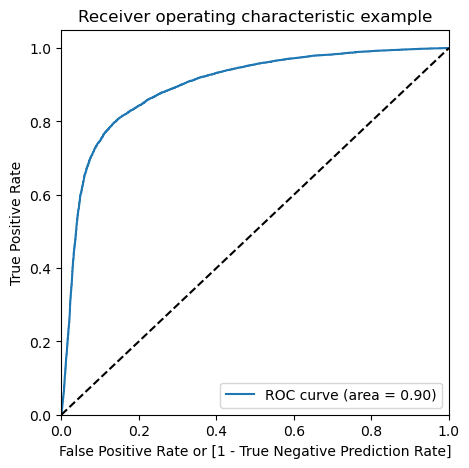

In [106]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

### Finding optimal cutoff point

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001276,0,1,0,0,0,0,0,0,0,0,0
1,0,0.263626,0,1,1,1,0,0,0,0,0,0,0
2,0,0.227703,0,1,1,1,0,0,0,0,0,0,0
3,0,0.198512,0,1,1,0,0,0,0,0,0,0,0
4,0,0.784862,1,1,1,1,1,1,1,1,1,0,0


In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

In [109]:
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.674979     0.975355     0.374603
0.2          0.2  0.737175     0.950451     0.523899
0.3          0.3  0.780595     0.919904     0.641287
0.4          0.4  0.806375     0.883196     0.729554
0.5          0.5  0.822070     0.839938     0.804203
0.6          0.6  0.829496     0.788832     0.870160
0.7          0.7  0.817433     0.718140     0.916726
0.8          0.8  0.765841     0.578118     0.953564
0.9          0.9  0.600460     0.218497     0.982424


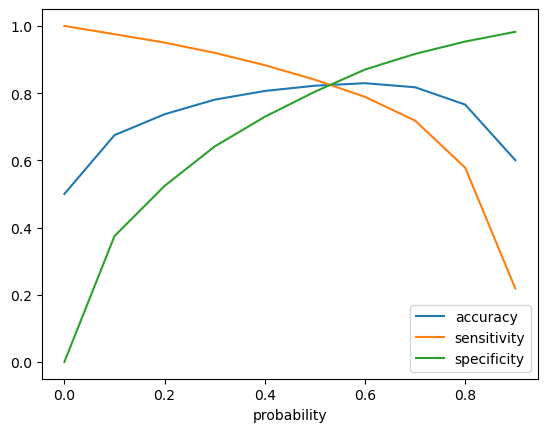

In [110]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

### Observation: 
At first, we chose the optimal classification threshold to be 0.5.

Upon examining the graph, it is evident that the ideal cutoff point is slightly above 0.5 but below 0.6. Therefore, let's make slight adjustments within this range.

In [111]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.001276,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.263626,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.227703,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.198512,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.784862,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


In [112]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.822070     0.839938     0.804203
0.51         0.51  0.823335     0.835333     0.811337
0.52         0.52  0.824827     0.830923     0.818730
0.53         0.53  0.825799     0.826578     0.825021
0.54         0.54  0.826740     0.821454     0.832025
0.55         0.55  0.828134     0.817498     0.838770
0.56         0.56  0.829075     0.812634     0.845515
0.57         0.57  0.830047     0.808094     0.852001
0.58         0.58  0.829853     0.801090     0.858616
0.59         0.59  0.830274     0.795317     0.865231


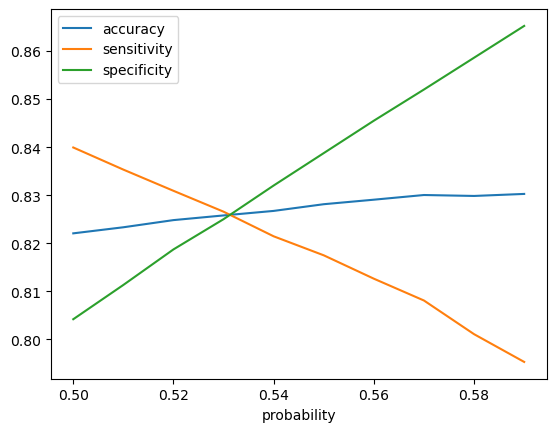

In [113]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above,we can take 0.54 is the optimum point to take it as a cutoff probability.

In [114]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.001276,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.263626,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.227703,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.198512,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.784862,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [115]:
print("Model overall accuracy:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

Model overall accuracy: 0.8257993384785005


In [116]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[12721  2698]
 [ 2674 12745]]


In [117]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# sensitivity of logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8265775990660873
Specificity =  0.8250210778909138
False Positive Rate =  0.1749789221090862
Precision =  0.8252930130156058
True Negative Prediction Rate =  0.8263072426112374


### Precision and recall tradeoff

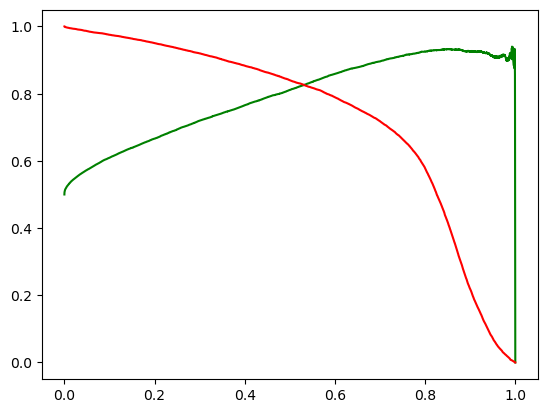

In [118]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Test set prediction

### Transforming and feature selection

In [119]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,...,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
11690,0.041100,0.462897,0.341093,0.105838,0.028070,0.177614,0.002824,0.131761,0.001148,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007246,0.064434
20904,0.036333,0.020509,0.029362,0.036829,0.022214,0.033209,0.019206,0.044633,0.009821,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115942,0.022616
13603,0.032333,0.087086,0.009614,0.007079,0.158268,0.049081,0.006683,0.007765,0.001784,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115942,0.034386
14388,0.035908,0.003693,0.010676,0.004539,0.029712,0.050142,0.017526,0.000000,0.001358,0.00022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615942,0.025117
8076,0.054536,0.100053,0.122007,0.121938,0.022821,0.007030,0.003344,0.150701,0.000139,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101449,0.040166


In [120]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,onnet_mou_6,onnet_mou_7,offnet_mou_7,offnet_mou_8,total_og_mou_8,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_8,count_rech_3g_8,vol_2g_mb_8,vol_3g_mb_8,arpu_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_7,monthly_3g_8,aug_vbc_3g,avg_arpu_6_7
11690,0.462897,0.341093,0.177614,0.002824,0.078014,0.004727,0.176471,0.217391,0.065217,0.029220,0.0,0.0,0.0,0.004539,0.0,0.0,0.0,0.0,0.0,0.064434
20904,0.020509,0.029362,0.033209,0.019206,0.045355,0.066451,0.035294,0.057971,0.028986,0.056192,0.0,0.0,0.0,0.002714,0.0,0.0,0.0,0.0,0.0,0.022616
13603,0.087086,0.009614,0.049081,0.006683,0.011695,0.019636,0.135294,0.086957,0.086957,0.011238,0.0,0.0,0.0,0.004539,0.0,0.0,0.0,0.0,0.0,0.034386
14388,0.003693,0.010676,0.050142,0.017526,0.020707,0.038638,0.029412,0.050725,0.028986,0.029220,0.0,0.0,0.0,0.004539,0.0,0.0,0.0,0.0,0.0,0.025117
8076,0.100053,0.122007,0.007030,0.003344,0.090558,0.055310,0.058824,0.086957,0.065217,0.044954,0.0,0.0,0.0,0.004539,0.0,0.0,0.0,0.0,0.0,0.040166


In [121]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [122]:
y_test_pred = res.predict(X_test_SM)
print("\n Top ten p value of the prediction:\n",y_test_pred[:10])


 Top ten p value of the prediction:
 11690    0.987212
20904    0.173307
13603    0.653398
14388    0.472932
8076     0.204792
17146    0.133188
812      0.025585
3028     0.074853
6803     0.003134
20227    0.000216
dtype: float64


In [123]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
11690,0.987212
20904,0.173307
13603,0.653398
14388,0.472932
8076,0.204792


In [124]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [125]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
11690,1
20904,0
13603,0
14388,0
8076,0


In [126]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn_probability,Conv_prob
11690,1,0.987212
20904,0,0.173307
13603,0,0.653398
14388,0,0.472932
8076,0,0.204792


In [127]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn_probability,Conv_prob,test_churn_pred
11690,1,0.987212,1
20904,0,0.173307,0
13603,0,0.653398,1
14388,0,0.472932,0
8076,0,0.204792,0


In [128]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

0.8239352843207233

## Metrics Evaluation

In [129]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[3177  678]
 [  62  286]]


In [130]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [131]:
# sensitivity logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8218390804597702
Specificity =  0.824124513618677
False Positive Rate =  0.17587548638132297
Precision =  0.2966804979253112
True Negative Prediction Rate =  0.9808582895955542


In [132]:
print("predicted model accuracy: ",round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred),2)*100,"%")
print("predicted model sensitivity: ",round(TP3 / float(TP3+FN3),2)*100,"%")

predicted model accuracy:  82.0 %
predicted model sensitivity:  82.0 %


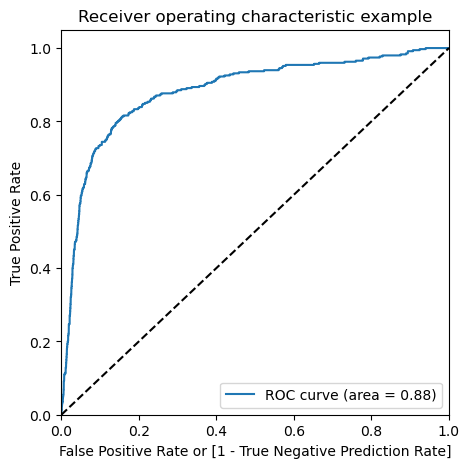

In [133]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability,y_pred_final.Conv_prob)

### Observation: The model can be considered as a good model as the train AUC score is 0.90 and on the test data it is 0.88

## PCA

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [135]:
X_train.shape

(16810, 64)

In [136]:
pca = PCA(random_state=42)

In [137]:
pca.fit(X_train)

PCA(random_state=42)

In [138]:
pca.components_

array([[ 5.88882809e-04, -7.36198762e-02, -8.89172984e-02, ...,
         1.68045287e-01,  5.25413557e-05,  1.57077705e-04],
       [ 2.89057514e-01,  1.40697910e-01,  1.98620226e-01, ...,
         4.01160516e-02,  1.45818039e-05,  2.28003241e-01],
       [ 2.09957365e-01, -3.55571175e-01, -4.35932502e-01, ...,
        -9.65272977e-03,  3.00035505e-03,  1.33172946e-01],
       ...,
       [ 3.27375739e-05, -1.12735286e-05,  2.13377010e-05, ...,
        -1.62820175e-05, -6.96603994e-06,  2.17760571e-05],
       [ 4.82930925e-06, -9.68373927e-06, -3.07555981e-05, ...,
         2.07525247e-06, -1.37152019e-04, -2.78157335e-07],
       [-1.75789004e-06,  3.29330654e-06,  1.38961764e-06, ...,
         1.47874531e-06,  1.82972428e-05, -5.90263262e-06]])

In [139]:
pca.components_.shape

(64, 64)

In [140]:
pca.explained_variance_ratio_

array([3.34347171e-01, 2.45119213e-01, 8.37738242e-02, 6.25740866e-02,
       4.43897011e-02, 3.36949561e-02, 3.34746933e-02, 3.00322297e-02,
       2.71993656e-02, 1.63963447e-02, 1.33412036e-02, 1.27514796e-02,
       7.36876245e-03, 6.96586566e-03, 6.58465482e-03, 5.56725655e-03,
       4.90495055e-03, 4.75700413e-03, 4.17710050e-03, 3.95854760e-03,
       3.64319291e-03, 2.27289558e-03, 2.24694129e-03, 1.88329767e-03,
       1.50960148e-03, 1.41832343e-03, 1.32668630e-03, 1.11713690e-03,
       7.40735166e-04, 7.17554833e-04, 3.15541502e-04, 3.08215777e-04,
       2.81276338e-04, 1.87810626e-04, 1.73100325e-04, 1.63456227e-04,
       1.20564617e-04, 8.13272670e-05, 7.03716455e-05, 1.68009294e-05,
       7.40118271e-06, 6.27376672e-06, 3.54147482e-06, 3.09058219e-06,
       1.84859362e-06, 1.66385887e-06, 1.50413613e-06, 3.90249013e-07,
       3.39249305e-07, 2.58215386e-07, 1.85541653e-07, 6.77474089e-08,
       5.48420406e-08, 3.37684211e-08, 2.59565006e-08, 2.30969512e-08,
      

In [141]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

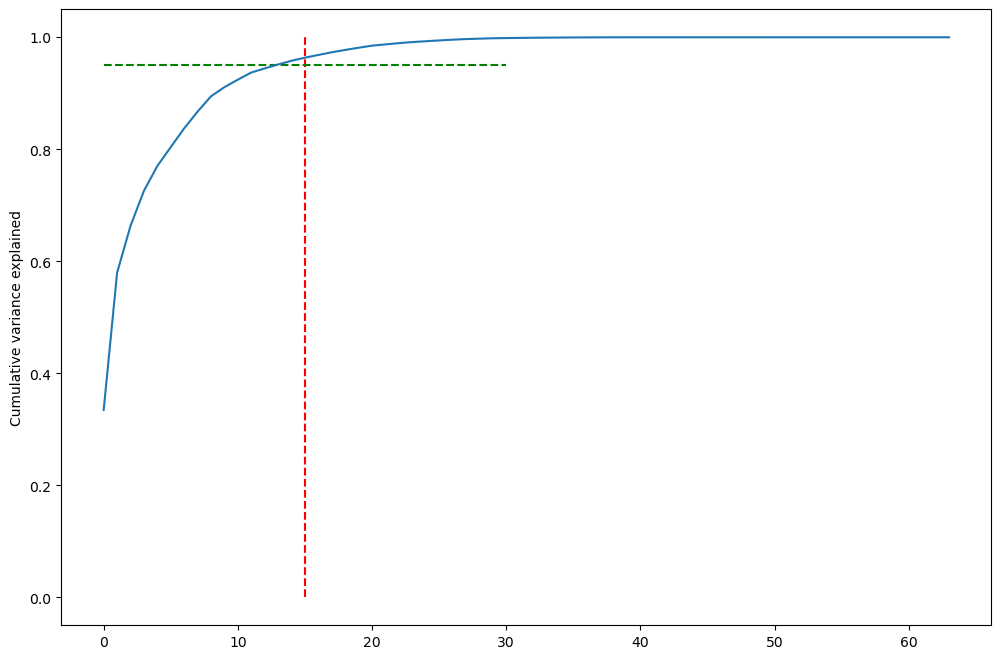

In [142]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

## Using Incremental PCA for better results

In [360]:
pca_final = IncrementalPCA(n_components=14)

In [361]:
df_train_pca = pca_final.fit_transform(X_train)

<Axes: >

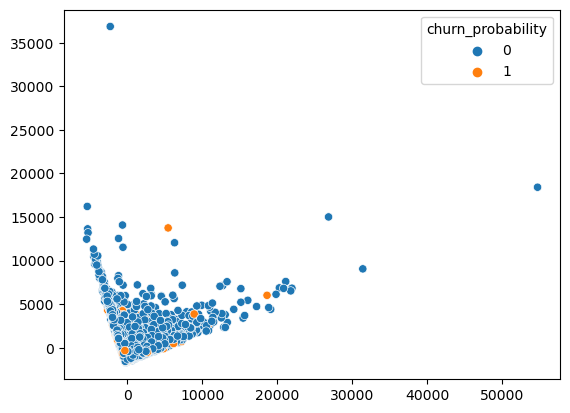

In [362]:
sns.scatterplot(x=df_train_pca[:,0], y=df_train_pca[:,1], hue=y_train)

<Axes: >

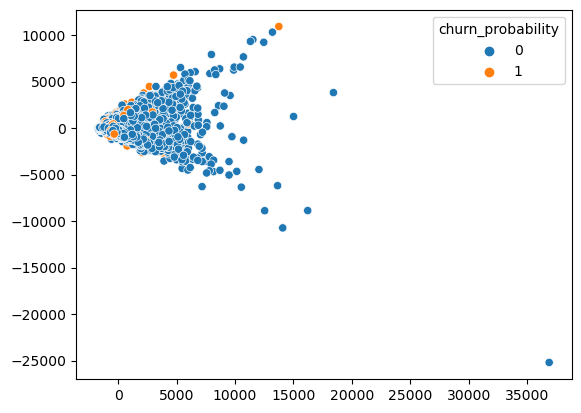

In [363]:
sns.scatterplot(x=df_train_pca[:,1], y=df_train_pca[:,2], hue=y_train)

In [364]:
df_train_pca.shape

(16810, 14)

In [365]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [366]:
corrmat.shape

(14, 14)

In [367]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(4203, 14)

## Logistic regression on the Principal components

In [368]:
learner_pca = LogisticRegression()

In [369]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [370]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [371]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

### Confusion matrix and metrics

In [372]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [373]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[3836   38]
 [ 280   49]]


In [374]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [375]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))


Accuracy: 0.9243397573162027
Sensitivity: 0.14893617021276595
Specificity: 0.9901910170366546


### Predictions on train set

In [376]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [377]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.87'

### Confusion matrix and metrics

In [378]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [379]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

[[15264   136]
 [ 1192   218]]


In [380]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [381]:
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy: 0.9209994051160024
Sensitivity: 0.15460992907801419
Specificity: 0.9911688311688311


## Decision Tree with PCA

In [439]:
from sklearn.tree import DecisionTreeClassifier

In [440]:
dt = DecisionTreeClassifier(random_state=42)

In [441]:
from sklearn.model_selection import GridSearchCV

In [442]:
#tuning
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [443]:
# Grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [444]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [445]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.155372,0.027523,0.004673,0.004622,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,46
1,0.155996,0.024948,0.004349,0.003007,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,46
2,0.125472,0.010172,0.003870,0.000691,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,46
3,0.124732,0.007284,0.003180,0.000657,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,46
4,0.128072,0.013738,0.002049,0.001124,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,46


In [446]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
39,0.329238,0.004154,0.003124,0.002784,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.921961,0.925529,0.925036,0.922656,0.923795,0.001517,1
41,0.326066,0.008760,0.002416,0.001410,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.921961,0.925529,0.925036,0.922656,0.923795,0.001517,1
54,0.507198,0.019471,0.002412,0.000826,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.923864,0.922912,0.923846,0.923846,0.923617,0.000407,3
56,0.545269,0.037361,0.004803,0.003106,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.923864,0.922912,0.923846,0.923846,0.923617,0.000407,3
69,0.609096,0.042101,0.002804,0.001826,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min...",0.923864,0.922912,0.923846,0.923846,0.923617,0.000407,3


In [447]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [448]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [449]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [450]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [451]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [452]:
evaluate_model(dt_best)

Train Accuracy : 0.9374776918500892
Train Confusion Matrix:
[[15103   297]
 [  754   656]]
--------------------------------------------------
Test Accuracy : 0.9262431596478705
Test Confusion Matrix:
[[3772  102]
 [ 208  121]]


## Random forest with PCA

In [488]:
from sklearn.ensemble import RandomForestClassifier

In [489]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

8


In [505]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=10, random_state=100, oob_score=True, verbose=1)

In [506]:
rf.fit(df_train_pca, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.8s finished


RandomForestClassifier(max_depth=5, max_features=10, oob_score=True,
                       random_state=100, verbose=1)

In [507]:
rf.oob_score_

0.9267697798929209

### Hyperparameter tuning

In [628]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [664]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [665]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [666]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [667]:
grid_search.best_score_

0.9212373292891696

In [672]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [695]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [696]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [697]:
evaluate_model(rfc_model)

Train Accuracy : 0.9292088042831648
Train Confusion Matrix:
[[15293   107]
 [ 1083   327]]
--------------------------------------------------
Test Accuracy : 0.9300499643112062
Test Confusion Matrix:
[[3843   31]
 [ 263   66]]


In [698]:
rfc_model.feature_importances_

array([0.07372426, 0.13883312, 0.02916697, 0.09338881, 0.02748994,
       0.09177536, 0.15547585, 0.04468214, 0.04129395, 0.20056278,
       0.01949361, 0.03475043, 0.03814673, 0.01121605])

###
Observation: The optimal parameters resulted in an accuracy of 92%, and upon using the PCA components we get to see that the   accuracy, hovers around 93%.

## Final Recommendation

####
The Random Forest model demonstrates superior predictive capability for churn based on accuracy as the performance metric.

The reception of calls, whether from local *same-operator mobile, other-operator mobile, fixed lines, STD, or special categories*  significantly influences the assessment of churn likelihood. Consequently, the operator should prioritize the analysis of incoming call data and consider offering special incentives to customers experiencing a decline in incoming calls.

The performance summaries for three different models—Logistic Regression with Recursive Feature Elimination (RFE), Logistic Regression with Principal Component Analysis (PCA), and Random Forest—are as follows:

### Logistic regression
Train Accuracy ~90%, Test Accuracy ~88%

###
Logistic regression with PCA
Train Accuracy : ~92% . Test Accuracy : ~92%

Decision Tree with PCA:
Train Accuracy : ~93% . Test Accuracy : ~92%

Random Forest with PCA:
Train Accuracy :~ 93% . Test Accuracy :~ 93%

Since, Random Forest model with PCA gives us better accuracy, we will test our test data on this model and generate the churn data.

We have chosen 10 maximum and top features and built the Random Forest model, and we have got the better model with hyperparameter tuning with max_depth as 10, min_samples_leaf=50 and min_samples_split=100.
                             

## Building model with Random forest with the test.csv to generate submission.csv file

In [699]:
test_data = pd.read_csv("test.csv")

In [700]:
test_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [701]:
test_data.shape

(30000, 171)

In [702]:
test_data.isnull().sum()

id                              0
circle_id                       0
loc_og_t2o_mou                316
std_og_t2o_mou                316
loc_ic_t2o_mou                316
last_date_of_month_6            0
last_date_of_month_7          202
last_date_of_month_8          367
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  1169
onnet_mou_7                  1172
onnet_mou_8                  1675
offnet_mou_6                 1169
offnet_mou_7                 1172
offnet_mou_8                 1675
roam_ic_mou_6                1169
roam_ic_mou_7                1172
roam_ic_mou_8                1675
roam_og_mou_6                1169
roam_og_mou_7                1172
roam_og_mou_8                1675
loc_og_t2t_mou_6             1169
loc_og_t2t_mou_7             1172
loc_og_t2t_mou_8             1675
loc_og_t2m_mou_6             1169
loc_og_t2m_mou_7             1172
loc_og_t2m_mou_8             1675
loc_og_t2f_mou

In [703]:
churn_id = test_data['id']

In [704]:
test_data['tenure'] = (test_data['aon']/30).round(0)
test_data["avg_arpu_6_7"]= (test_data['arpu_6']+test_data['arpu_7'])/2

test_data = test_data[X.columns]

In [705]:
test_data.shape

(30000, 64)

In [706]:
test_data_null = test_data.isnull().sum().sum() / np.product(test_data.shape) * 100
test_data_null

23.206458333333334

In [707]:
for col in test_data.columns:
    null_col = test_data[col].isnull().sum() / test_data.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

arpu_8 : 0.00
onnet_mou_6 : 3.90
onnet_mou_7 : 3.91
onnet_mou_8 : 5.58
offnet_mou_6 : 3.90
offnet_mou_7 : 3.91
offnet_mou_8 : 5.58
std_og_t2t_mou_8 : 5.58
std_og_t2m_mou_8 : 5.58
isd_og_mou_8 : 5.58
og_others_6 : 3.90
og_others_7 : 3.91
og_others_8 : 5.58
total_og_mou_7 : 0.00
total_og_mou_8 : 0.00
std_ic_mou_8 : 5.58
total_ic_mou_8 : 0.00
ic_others_6 : 3.90
ic_others_7 : 3.91
ic_others_8 : 5.58
total_rech_num_6 : 0.00
total_rech_num_7 : 0.00
total_rech_num_8 : 0.00
total_rech_amt_8 : 0.00
max_rech_amt_6 : 0.00
max_rech_amt_7 : 0.00
max_rech_amt_8 : 0.00
max_rech_data_6 : 74.72
max_rech_data_7 : 74.31
max_rech_data_8 : 73.59
count_rech_2g_6 : 74.72
count_rech_2g_7 : 74.31
count_rech_2g_8 : 73.59
count_rech_3g_6 : 74.72
count_rech_3g_7 : 74.31
count_rech_3g_8 : 73.59
vol_2g_mb_6 : 0.00
vol_2g_mb_7 : 0.00
vol_2g_mb_8 : 0.00
vol_3g_mb_6 : 0.00
vol_3g_mb_7 : 0.00
vol_3g_mb_8 : 0.00
arpu_3g_6 : 74.72
arpu_3g_7 : 74.31
arpu_3g_8 : 73.59
arpu_2g_6 : 74.72
arpu_2g_7 : 74.31
arpu_2g_8 : 73.59
n

In [708]:
for col in test_data.columns:
    null_col = test_data[col].isnull().sum() / test_data.shape[0] * 100
    if null_col > 0:
        test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [709]:
test_data.isnull().sum()

arpu_8              0
onnet_mou_6         0
onnet_mou_7         0
onnet_mou_8         0
offnet_mou_6        0
offnet_mou_7        0
offnet_mou_8        0
std_og_t2t_mou_8    0
std_og_t2m_mou_8    0
isd_og_mou_8        0
og_others_6         0
og_others_7         0
og_others_8         0
total_og_mou_7      0
total_og_mou_8      0
std_ic_mou_8        0
total_ic_mou_8      0
ic_others_6         0
ic_others_7         0
ic_others_8         0
total_rech_num_6    0
total_rech_num_7    0
total_rech_num_8    0
total_rech_amt_8    0
max_rech_amt_6      0
max_rech_amt_7      0
max_rech_amt_8      0
max_rech_data_6     0
max_rech_data_7     0
max_rech_data_8     0
count_rech_2g_6     0
count_rech_2g_7     0
count_rech_2g_8     0
count_rech_3g_6     0
count_rech_3g_7     0
count_rech_3g_8     0
vol_2g_mb_6         0
vol_2g_mb_7         0
vol_2g_mb_8         0
vol_3g_mb_6         0
vol_3g_mb_7         0
vol_3g_mb_8         0
arpu_3g_6           0
arpu_3g_7           0
arpu_3g_8           0
arpu_2g_6 

### PCA on test.csv

In [710]:
test_data_final = pca_final.transform(test_data)

In [711]:
test_data_final.shape

(30000, 14)

### Random forest model

In [712]:
predict_probabilty = rfc_model.predict(test_data_final)

In [713]:
predict_probabilty.shape

(30000,)

In [714]:
#checking id columns rows matches with churn probability
len(churn_id)

30000

In [715]:
final_prediction = pd.DataFrame({'id':churn_id,'churn_probability':predict_probabilty})

In [716]:
final_prediction.to_csv('submission.csv',index=False)